# Jon Williamson

# 425005368

# CSCE 421: Project Winning Percent Models

## Preprocessing




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [3]:
df = pd.read_csv('master_data4.csv', index_col=0)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
0,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0,0.267857,1
1,Adam Gase,2016,38,0,0,0,0,5,3,0,...,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0,0.500000,1
2,Adam Gase,2019,41,1,0,0,0,5,3,3,...,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0,0.281250,0
3,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0,0.745455,0
4,Al Cornsweet,1931,25,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0


Because the feature names are complex, the stored data labels them only by feature number. 


Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 13
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = "Times New Roman"

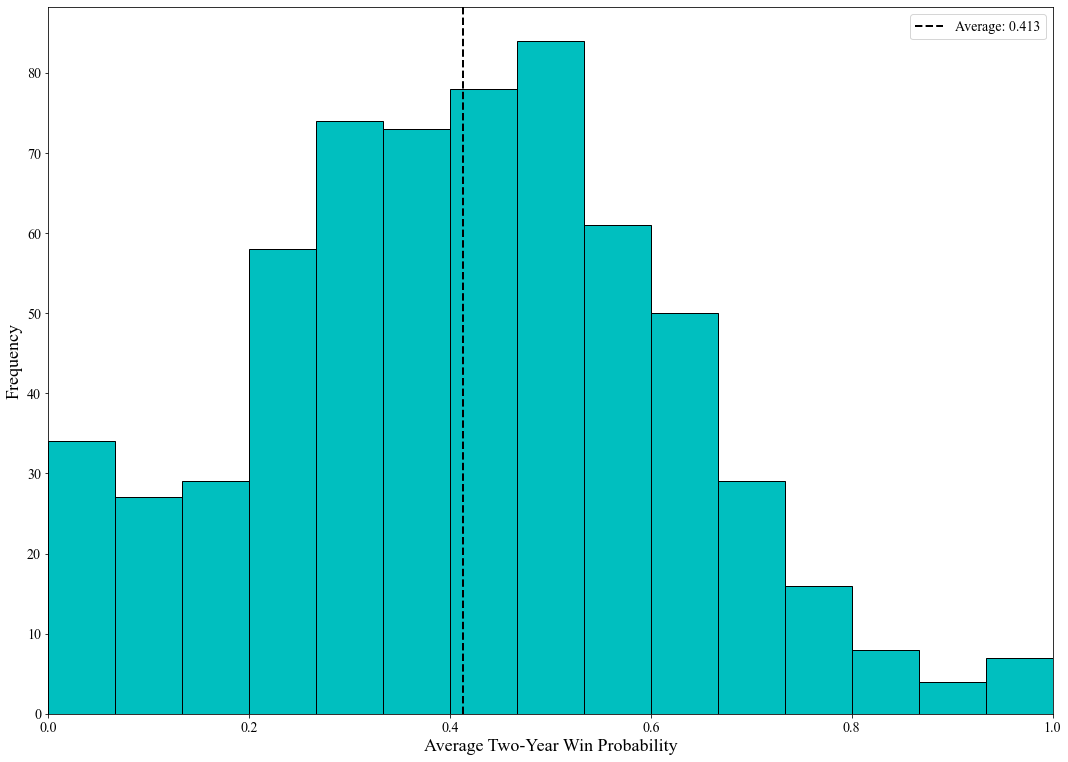

In [4]:
#rcParams['figure.figsize'] = 9, 6.5
raw_win_pct = df['Avg 2Y Win Pct'].values.T
raw_win_pct_mean = np.mean(raw_win_pct)
plt.hist(raw_win_pct, bins=15, color='c', edgecolor='k')
plt.axvline(raw_win_pct_mean, color='k', linestyle='dashed', linewidth=2, label='Average: {:.3f}'.format(raw_win_pct_mean))
plt.xlim(0,1)
plt.xlabel('Average Two-Year Win Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Another consideration, although not analyzed in the model, is the change in the average 2Y winning percentage for each team based on the HC hire. Feature 19 is the hiring team's average percentage prior to the hire. Thus, subtracting this feature from the aforementioned label yields an improvement in winning percentage.

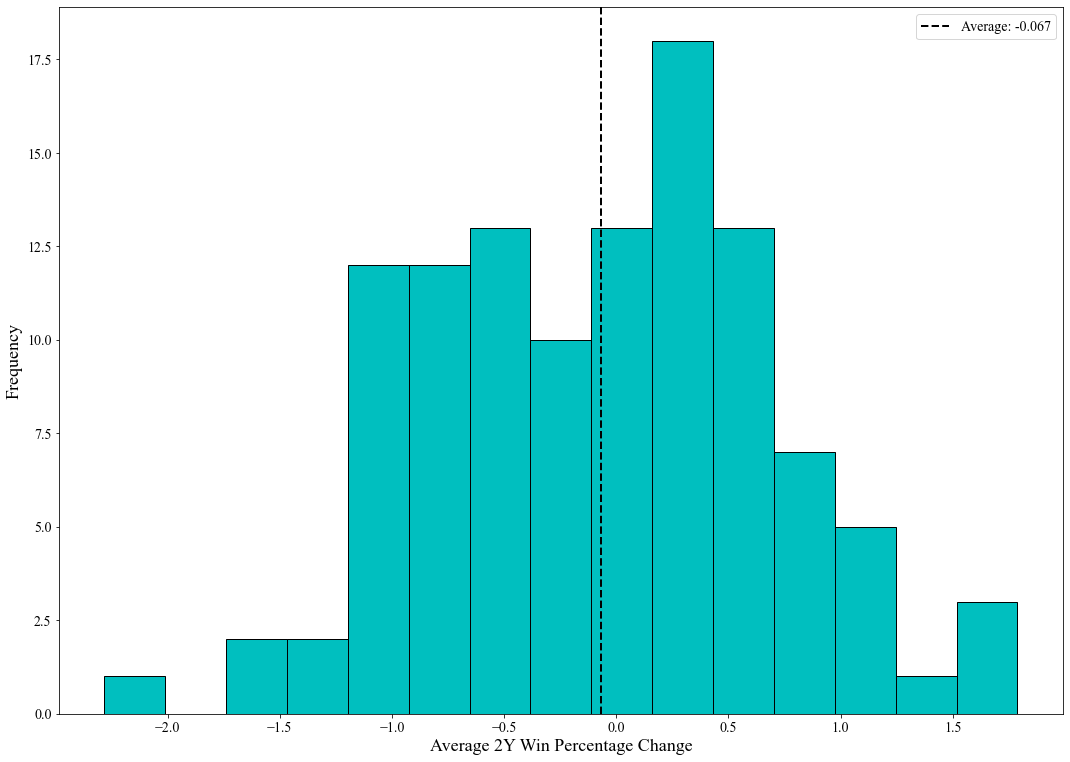

In [5]:
prev_win_pct = df['Feature 19'].values.T
win_pct_improvement = raw_win_pct - prev_win_pct
win_pct_improvement = win_pct_improvement[~np.isnan(win_pct_improvement)]
win_pct_improvement_mean = np.mean(win_pct_improvement)
plt.hist(win_pct_improvement, bins=15, color='c', edgecolor='k')
plt.axvline(win_pct_improvement_mean, color='k', linestyle='dashed', linewidth=2, label='Average: {:.3f}'.format(win_pct_improvement_mean))
#plt.xlim(0,1)
plt.xlabel('Average 2Y Win Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
X = df.iloc[:,2:-2]
y = df.iloc[:,-2]
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
0,47,0,0,0,0,12,0,0,NaN,NaN,...,0.428571,-0.956368,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0
1,38,0,0,0,0,5,3,0,1.532619,1.348807,...,0.437500,-0.268496,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0
2,41,1,0,0,0,5,3,3,1.532619,1.348807,...,0.281250,-0.656092,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0
3,44,0,8,0,12,0,0,0,NaN,NaN,...,0.400000,0.116123,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0
4,25,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
y.head(5)

0    0.267857
1    0.500000
2    0.281250
3    0.745455
4    0.200000
Name: Avg 2Y Win Pct, dtype: float64

In [7]:
y.shape

(632,)

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The 3x3 white boxes in the matrix show that the correlation between Features 10-12 and 13-15 have no correlation. This is expected, as Features 10-12 are based on performance as an offensive coordinator, while features 13-15 are from performance as a defensive coordinator. No coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features. 

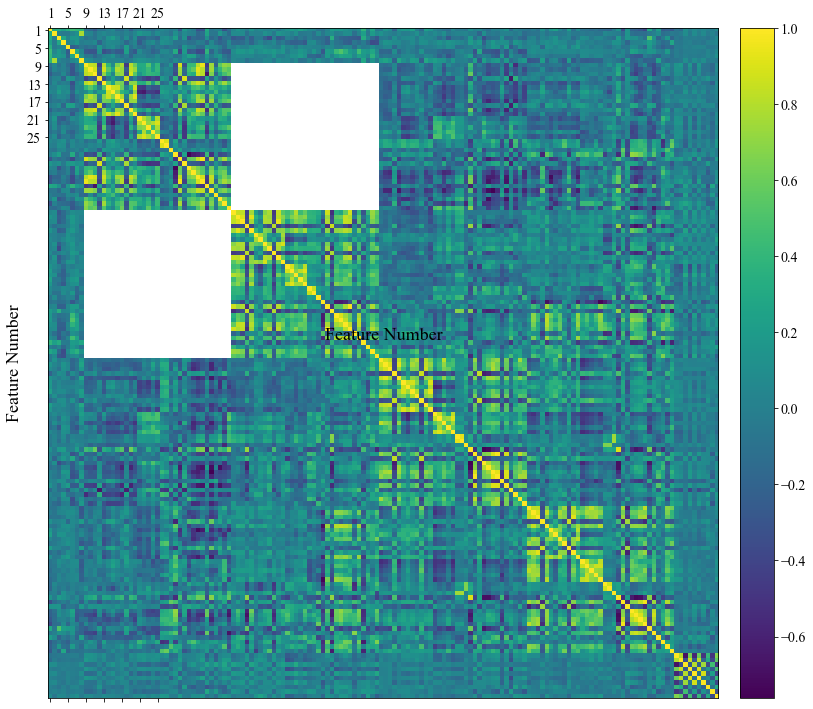

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.matshow(X.corr())
plt.xticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.yticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.ylabel('Feature Number')
plt.xlabel('Feature Number', labelpad=-370)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

plt.colorbar(cax=cax)
#plt.clim(-1, 1)
plt.show()

Holding out 20% of data for testing:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True, random_state=0)

## Model 1: Linear Regression with Lasso Regularization

Necessary Imports:

In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

The following code performs cross-validation to automatically detect hyperparameters to find the best model for each split. The `LassoCV` uses an internal 5-fold cross-validation to select the best $\alpha$ for regularization. The code runs an external 10-fold cross-validation to cross-validate the results. Note that there is still held out data from the original set. 

In [12]:
result_dict = { 'alpha_':       [],
                'coef_':        [],
                'train_score':     [],
                'test_score':    [],
                'alphas_':      [],
                'mse_path_':    [],
                'intercept_':   []
}

num_of_folds = 10
max_iter = 1e6

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = LassoCV(eps=1e-5, n_alphas=1000, max_iter=max_iter, verbose=True).fit(X_train__, y_train_)
    result_dict['alpha_'].append(model.alpha_)
    result_dict['intercept_'].append(model.intercept_)
    result_dict['coef_'].append(model.coef_)
    result_dict['alphas_'].append(model.alphas_)
    result_dict['mse_path_'].append(model.mse_path_)
    result_dict['test_score'].append(mean_squared_error(y_test_, model.predict(X_test__)))
    result_dict['train_score'].append(mean_squared_error(y_train_, model.predict(X_train__)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Thew following graph shows the convergence of the mse in the internal cross-validation.

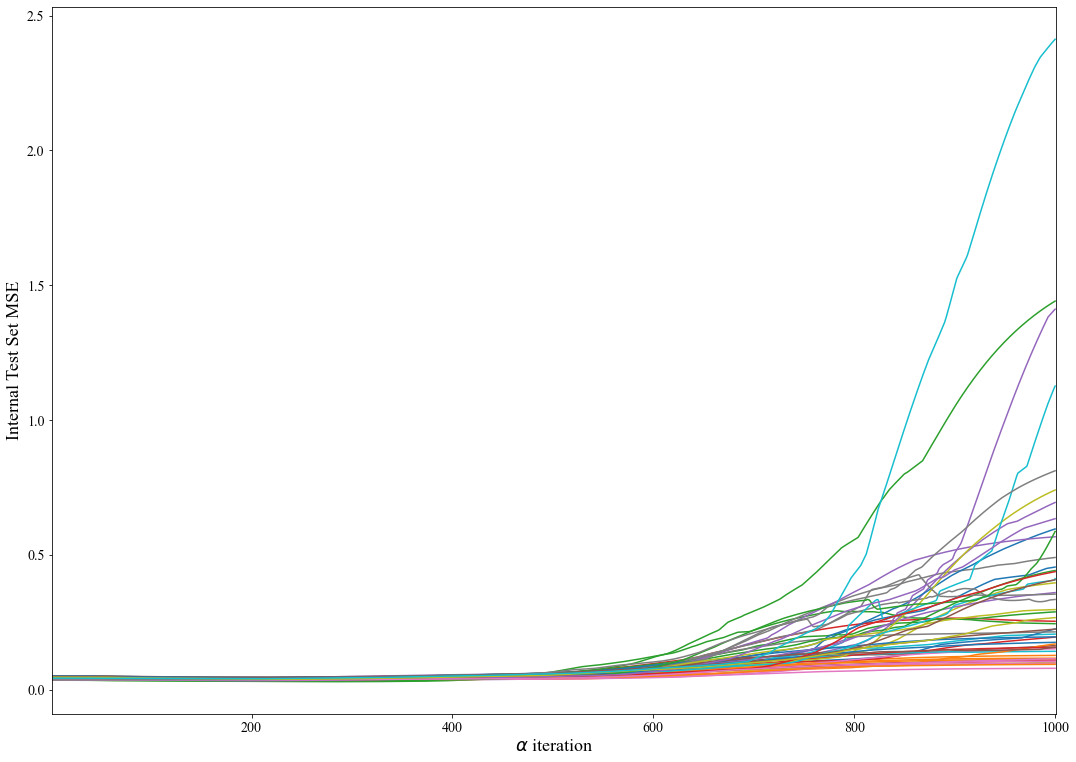

In [13]:
list_length = 0
for mse_list in result_dict['mse_path_']:
    list_length = len(mse_list)
    plt.plot(np.arange(1, list_length + 1), mse_list)
plt.xlim(1, list_length + 1)
plt.xlabel(R'$\alpha$' + ' iteration')
plt.ylabel('Internal Test Set MSE')
plt.show()

The following code prints the average mean squared error value for each model on the train and test sets. Following this, the code plots a box plot for the absolute value of each coefficient, also including the intercept for the model. 

In [14]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(result_dict['train_score'])), np.sqrt(np.mean(result_dict['test_score']))))

Average Train RMSE: 0.190
Average Test RMSE: 0.195


In [15]:
print('Average Best Alpha: {:.3f}'.format(np.mean(result_dict['alpha_'])))

Average Best Alpha: 0.006


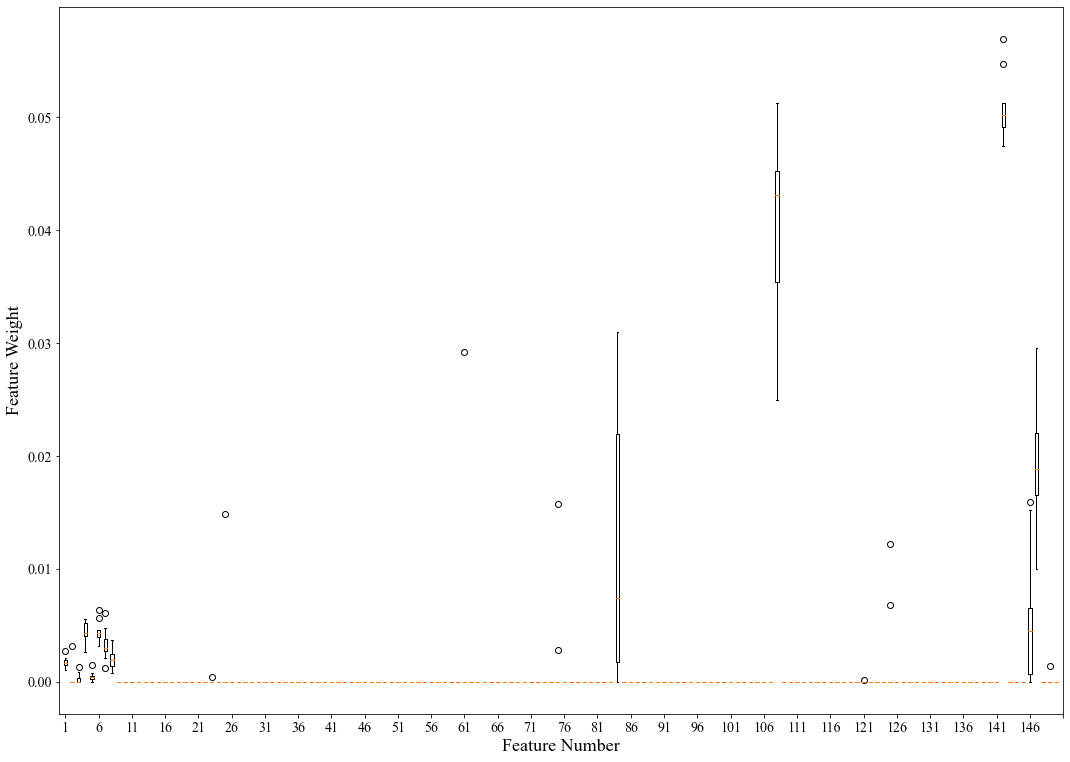

In [16]:
#rcParams['figure.figsize'] = 12, 8
coef_list = [np.abs(l) for l in zip(*result_dict['coef_'])]
label_list = [item.split()[-1] for item in X.columns.values]
label_list.append("")
plt.boxplot(coef_list)
plt.xlim(0, len(coef_list))
plt.xticks(np.arange(1, len(label_list) + 1, 5), labels=label_list[::5])
plt.xlabel('Feature Number')
plt.ylabel('Feature Weight')
plt.show()

In [17]:
feature_avg_weight_dict = dict(zip(label_list[:-1], [np.mean(l) for l in zip(coef_list)]))
feature_std_weight_dict = dict(zip(label_list[:-1], [np.std(l) for l in zip(coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[key]))
    count += 1

Rank  1: 142, has an avg. importance of 0.0508 with a std. dev. of 0.0029.
Rank  2: 108, has an avg. importance of 0.0400 with a std. dev. of 0.0079.
Rank  3: 147, has an avg. importance of 0.0195 with a std. dev. of 0.0052.
Rank  4: 84, has an avg. importance of 0.0118 with a std. dev. of 0.0110.
Rank  5: 146, has an avg. importance of 0.0055 with a std. dev. of 0.0055.
Rank  6: 6, has an avg. importance of 0.0045 with a std. dev. of 0.0009.
Rank  7: 4, has an avg. importance of 0.0043 with a std. dev. of 0.0010.
Rank  8: 7, has an avg. importance of 0.0033 with a std. dev. of 0.0013.
Rank  9: 61, has an avg. importance of 0.0029 with a std. dev. of 0.0088.
Rank 10: 8, has an avg. importance of 0.0020 with a std. dev. of 0.0008.
Rank 11: 125, has an avg. importance of 0.0019 with a std. dev. of 0.0040.
Rank 12: 75, has an avg. importance of 0.0019 with a std. dev. of 0.0047.
Rank 13: 1, has an avg. importance of 0.0017 with a std. dev. of 0.0004.
Rank 14: 25, has an avg. importance of

In [18]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(result_dict['train_score'])), np.sqrt(np.mean(result_dict['test_score']))))

Average Train RMSE: 0.190
Average Test RMSE: 0.195


In [43]:
from sklearn.linear_model import Lasso
plot_pred = None
model = None
# Loop only exists to limit variable scope.
for i in [1]:
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    model = Lasso(alpha=np.mean(result_dict['alpha_'])).fit(X_train__, y_train)
    plot_pred = model.predict(X_test__)

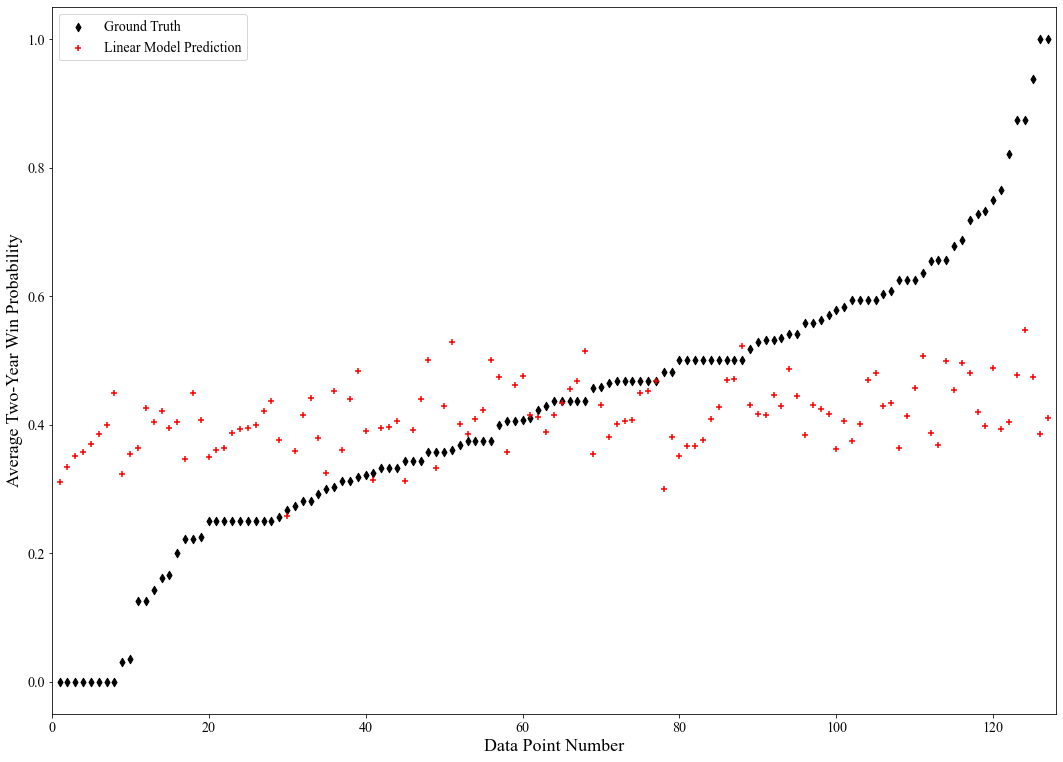

In [44]:
#rcParams['figure.figsize'] = 9, 6.5
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(1, len(sorted_y_test) + 1), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(1, len(sorted_plot_pred) + 1), sorted_plot_pred, marker='+', color='r', label='Linear Model Prediction')
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.xlabel('Data Point Number')
plt.ylabel('Average Two-Year Win Probability')
plt.legend()
plt.show()

In [21]:
print('Average RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(sorted_y_test, sorted_plot_pred))))
print('RMSE when predicting the mean: {:.3f}'.format(np.sqrt(np.mean((np.mean(sorted_y_test) - sorted_y_test) ** 2))))

Average RMSE: 0.200
RMSE when predicting the mean: 0.214


These results show that the regularized linear regression, on average, predicts the winning percent of coaching hires over their first two years within 20%. This is equivalent to 3 games in a 16 game season. Although the result of this model is surprising, it is likely that a standard regression with regularization is not sufficient to model the complex nature of this data given that its predictions center closely on the expected winning percentage. 

## Model 2: XGBoost Regressor

Necessary Imports:

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

As before, we will implement the model with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [23]:

xgbr_param_dict = {
    "n_estimators":     [1, 5, 10, 20, 50, 100],
    "learning_rate":    [.01, .05, .1, .15, .2, .25, .3],
    "max_depth":        [2, 4, 6, 8, 10, 12],
    "gamma":            [0, .01, .05, .1],
    "alpha":            [0, .01, .05, .1]
}
"""
xgbr_param_dict = {
    "n_estimators":     [5, 10, 20, 50],
    "learning_rate":    [.01, .1, .2],
}
"""
xgbr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

xgbr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'reg:squarederror',
    'n_jobs':       1
}

num_of_folds=10

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(XGBRegressor(**default_xgbr_params), param_grid=xgbr_param_dict, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict(X_train__)
    te_pred  = best_model.predict(X_test__)

    xgbr_result_dict['train_score'].append(mean_squared_error(y_train_, tr_pred))
    xgbr_result_dict['test_score'].append(mean_squared_error(y_test_, te_pred))

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 724 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 2324 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 3424 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 4724 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 6224 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7924 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9824 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 11924 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14224 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 16724 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 19424 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 20160 out of

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1568 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 2468 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 4868 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 6368 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8068 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9968 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12068 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14368 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 16868 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 19568 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 20160 out of

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 924 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 2404 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 4804 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8004 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9904 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 12004 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 14304 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 16804 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 19504 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 20160 out of 20160 | elapsed:  3.8min finished


Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 2484 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 3584 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 4884 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 6384 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8084 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9984 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12084 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14384 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 16884 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 19584 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 20129 out of

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 2484 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 3584 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 4884 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 6384 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8084 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9984 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12084 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14384 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 16884 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 19584 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 20160 out of 20160 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyB

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 2484 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 3584 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 4884 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 6384 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8084 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9984 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12084 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14384 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 16884 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 19584 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 20129 out of 20160 | elapsed:  3.8min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 20160 out of 20160 | elapsed:  3.9min finished
[Parallel(n_jobs=-1

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 2484 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 3584 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 4884 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 6384 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8084 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9984 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12084 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14384 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 16884 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 19584 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 20129 out of 20160 | elapsed:  3.9min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 20160 out of 20160 | elapsed:  3.9min finished


Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 494 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1488 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 3488 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 4788 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 6288 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7988 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9888 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 11988 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14288 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 16788 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 19488 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 20160 out of

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1867 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 2628 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 3728 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 5028 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8228 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 10128 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 12228 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 14528 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 17028 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 19728 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 20160 out of 20160 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend Loky

Fitting 5 folds for each of 4032 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 2484 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 3584 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 4884 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 6384 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8084 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9984 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 12084 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 14384 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 16884 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 19584 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 20129 out of 20160 | elapsed:  4.0min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 2016

In [24]:
xgbr_best_params_dict

{'n_estimators': [50, 20, 100, 20, 20, 20, 100, 10, 20, 50],
 'learning_rate': [0.05, 0.1, 0.05, 0.15, 0.1, 0.1, 0.05, 0.25, 0.1, 0.15],
 'max_depth': [4, 2, 8, 2, 2, 4, 4, 6, 4, 4],
 'gamma': [0, 0.1, 0.1, 0.05, 0.1, 0.01, 0, 0.01, 0.01, 0.1],
 'alpha': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

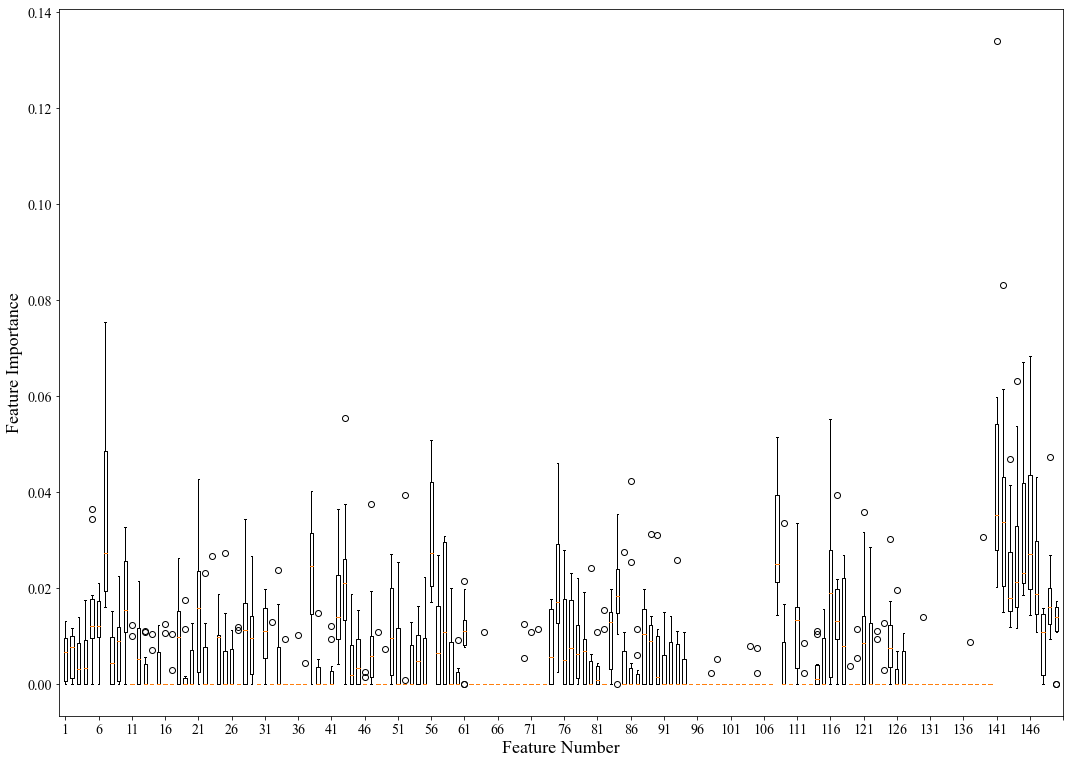

In [45]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(1, len(label_list) + 1, 5), labels=label_list[::5])
plt.xlim(0, len(label_list))
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [26]:
feature_avg_weight_dict = dict(zip(label_list[0:-1], [np.mean(l) for l in zip(xgbr_coef_list)]))
feature_std_weight_dict = dict(zip(label_list[0:-1], [np.std(l) for l in zip(xgbr_coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[key]))
    count += 1

Rank  1: 141, has an avg. importance of 0.0472 with a std. dev. of 0.0316.
Rank  2: 7, has an avg. importance of 0.0372 with a std. dev. of 0.0216.
Rank  3: 142, has an avg. importance of 0.0369 with a std. dev. of 0.0206.
Rank  4: 145, has an avg. importance of 0.0343 with a std. dev. of 0.0179.
Rank  5: 146, has an avg. importance of 0.0340 with a std. dev. of 0.0186.
Rank  6: 56, has an avg. importance of 0.0314 with a std. dev. of 0.0125.
Rank  7: 108, has an avg. importance of 0.0295 with a std. dev. of 0.0122.
Rank  8: 144, has an avg. importance of 0.0283 with a std. dev. of 0.0165.
Rank  9: 143, has an avg. importance of 0.0230 with a std. dev. of 0.0116.
Rank 10: 147, has an avg. importance of 0.0227 with a std. dev. of 0.0107.
Rank 11: 38, has an avg. importance of 0.0217 with a std. dev. of 0.0131.
Rank 12: 43, has an avg. importance of 0.0216 with a std. dev. of 0.0157.
Rank 13: 75, has an avg. importance of 0.0215 with a std. dev. of 0.0131.
Rank 14: 149, has an avg. impor

In [27]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(xgbr_result_dict['train_score'])), np.sqrt(np.mean(xgbr_result_dict['test_score']))))

Average Train RMSE: 0.154
Average Test RMSE: 0.194


The previously printed RMSE values show that the heavily cross-validated XGBoost does not have a better performance on the testing set than the regularized linear regression. It does, hoowever, show an increased performance on the testing set. This result is surprising, and suggests that the features selected for this model may not be sufficient to accurately predict a team's winning percentage in the first two years following a head coach hire. Before moving on to the next model, let's visualize the predictions of a model with the best average parameters on the held out test set.

In [46]:
plot_pred = None
xgbr = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    print(test_xgbr_best_params_dict)
    test_xgbr_best_params_dict.update(default_xgbr_params)
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    xgbr = XGBRegressor(**test_xgbr_best_params_dict).fit(X_train__, y_train)
    plot_pred = xgbr.predict(X_test__)

{'n_estimators': 20, 'learning_rate': 0.1, 'max_depth': 4, 'gamma': 0.1, 'alpha': 0}


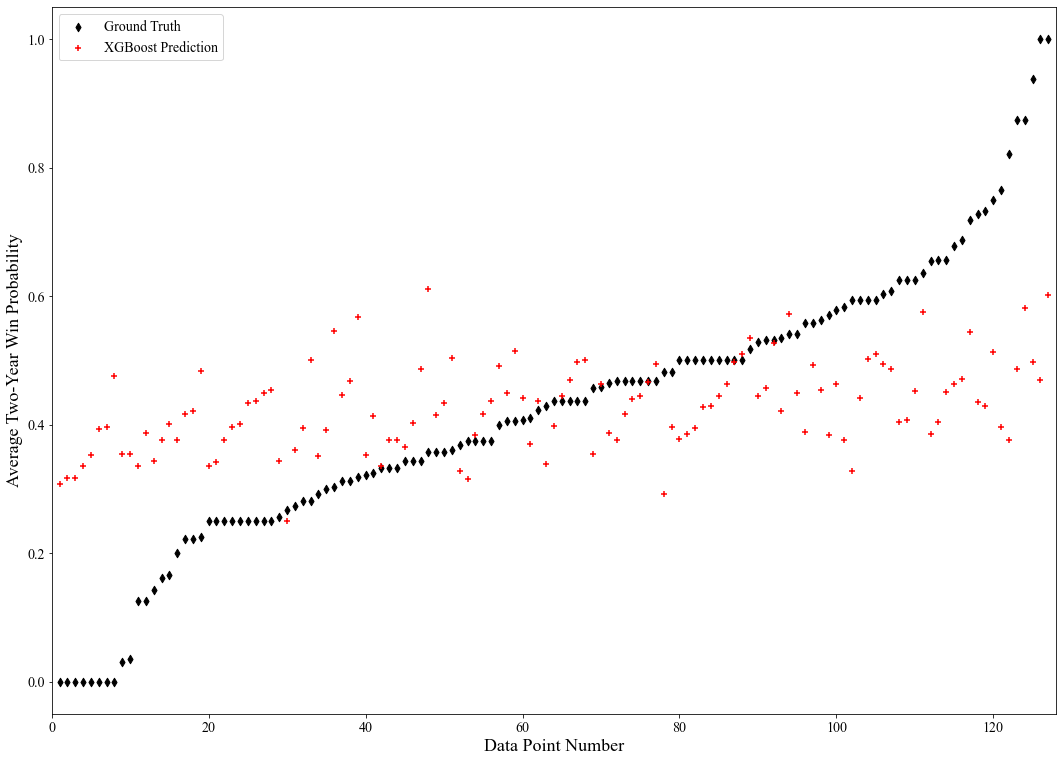

In [47]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(1, len(sorted_y_test) + 1), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(1, len(sorted_plot_pred) + 1), sorted_plot_pred, marker='+', color='r', label='XGBoost Prediction')
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.xlabel('Data Point Number')
plt.ylabel('Average Two-Year Win Probability')
plt.legend()
plt.show()

In [30]:
print('Average RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(sorted_y_test, sorted_plot_pred))))

Average RMSE: 0.192


The previous plot shows that the XGBoost model most often predicts the expected value of the winning percentage. Although this result is disappointing, the model's feature importance does provide some useful takeaways. These takeaways will be discussed in more detail in the final report. 

## Model 3: MLPRegressor

Necessary Imports:

In [31]:
from sklearn.neural_network import MLPRegressor

In [32]:

mlpr_param_dict = {
    "alpha":                [0, .0001, .001, .01],
    "hidden_layer_sizes":   [(100,), (50, 25), (50, 25, 15, 9)],
    "max_iter":             [200, 400, 600],
    "tol":                  [1e-4, 1e-5]
}
"""
mlpr_param_dict = {
    "alpha":                [0, .0001, .001],
    "hidden_layer_sizes":   [(19, 11, 7, 5, 3), (23, 19, 15, 11, 5)],
}
"""
mlpr_best_params_dict = {key: [] for key in mlpr_param_dict.keys()}

mlpr_result_dict = {    'train_score':  [],
                        'test_score':   []
}

default_mlpr_params = {
    "activation":   'relu',
    'solver':       'lbfgs'
}

num_of_folds=10

skf=KFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(MLPRegressor(**default_mlpr_params), param_grid=mlpr_param_dict, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        mlpr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    #xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict(X_train__)
    te_pred  = best_model.predict(X_test__)

    mlpr_result_dict['train_score'].append(mean_squared_error(y_train_, tr_pred))
    mlpr_result_dict['test_score'].append(mean_squared_error(y_test_, te_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   41.1s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   44.6s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.2s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   41.0s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   40.9s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   41.5s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   41.3s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.2s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   40.8s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   41.3s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [33]:
print('Average Train RMSE: {:.3f}\nAverage Test RMSE: {:.3f}'.format(np.sqrt(np.mean(mlpr_result_dict['train_score'])), np.sqrt(np.mean(mlpr_result_dict['test_score']))))

Average Train RMSE: 0.166
Average Test RMSE: 0.214


In [34]:
mlpr_best_params_dict

{'alpha': [0.001, 0.0001, 0, 0.01, 0.0001, 0.001, 0.01, 0, 0, 0.0001],
 'hidden_layer_sizes': [(50, 25, 15, 9),
  (50, 25, 15, 9),
  (50, 25, 15, 9),
  (50, 25, 15, 9),
  (50, 25, 15, 9),
  (50, 25, 15, 9),
  (50, 25, 15, 9),
  (50, 25, 15, 9),
  (50, 25, 15, 9),
  (50, 25, 15, 9)],
 'max_iter': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200],
 'tol': [1e-05,
  0.0001,
  0.0001,
  0.0001,
  0.0001,
  0.0001,
  0.0001,
  1e-05,
  1e-05,
  1e-05]}

In [48]:
test_mlpr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in mlpr_best_params_dict.items()}
print(test_mlpr_best_params_dict)
test_mlpr_best_params_dict.update(default_mlpr_params)
mean_imputer    = SimpleImputer()
imputed_X_train = mean_imputer.fit_transform(X_train)
imputed_X_test  = mean_imputer.transform(X_test)
mlpr = MLPRegressor(**test_mlpr_best_params_dict).fit(imputed_X_train, y_train)
plot_pred = mlpr.predict(imputed_X_test)

{'alpha': 0, 'hidden_layer_sizes': (50, 25, 15, 9), 'max_iter': 200, 'tol': 0.0001}


C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


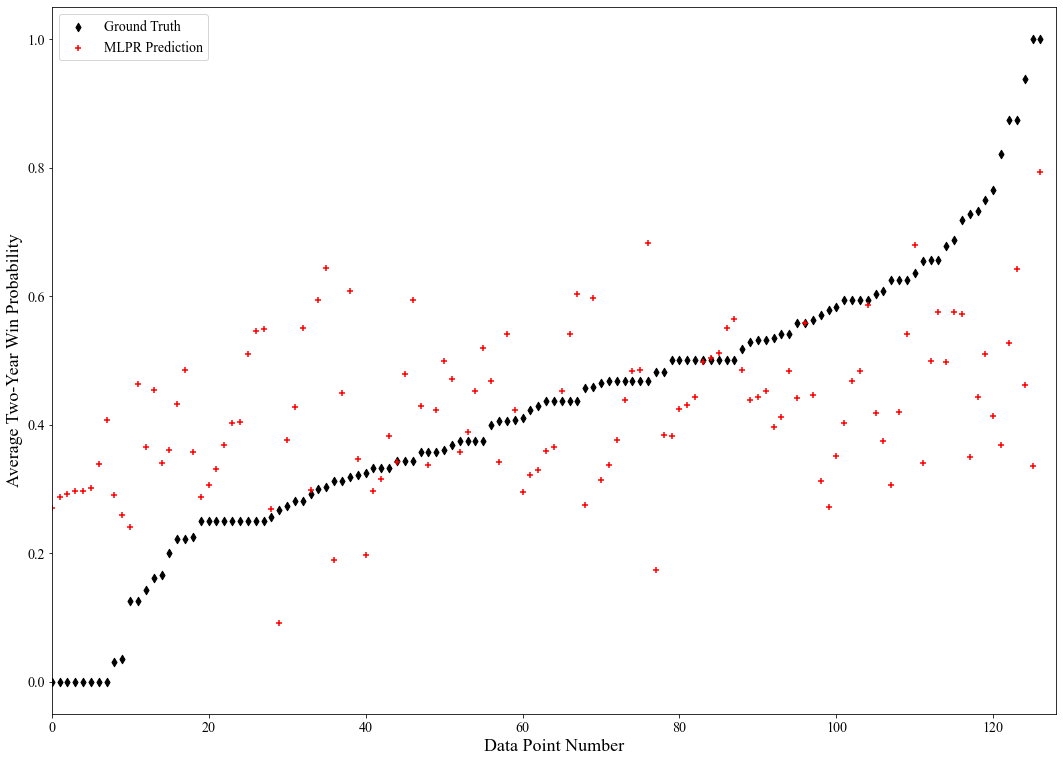

In [49]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='MLPR Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Average Two-Year Win Probability')
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [37]:
print('Average RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(sorted_y_test, sorted_plot_pred))))
print('RMSE when predicting the mean: {:.3f}'.format(np.sqrt(np.mean((np.mean(sorted_y_test) - sorted_y_test) ** 2))))

Average RMSE: 0.195
RMSE when predicting the mean: 0.214


In [10]:
df_ = pd.read_csv('master_data6.csv', index_col=0)
df_.fillna(0, inplace=True)
df_ = df_[df_['Coach Tenure Class'] == -1]
print(df_.shape)
df_.head(26)

(21, 154)


,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
25,Arthur Smith,2021,39,0,0,0,0,4,2,0,...,0.414842,0.582876,0.682812,-0.063956,1.099965,-0.166043,-0.076440,0.0,0.411765,-1
64,Brandon Staley,2021,39,0,1,4,0,3,1,0,...,0.098785,0.637349,-0.736478,0.251281,-0.170045,-0.927765,0.159792,0.0,0.558824,-1
66,Brian Daboll,2022,47,0,0,1,0,10,8,0,...,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0,0.404412,-1
122,Dan Campbell,2021,45,0,0,0,0,10,0,0,...,1.510555,-0.157285,1.646041,0.044737,1.331470,-1.425474,0.078812,0.0,0.367647,-1
137,DeMeco Ryans,2023,39,0,0,0,0,3,2,0,...,1.190423,-1.859089,1.562923,-1.609182,1.198335,0.756328,0.812410,0.0,0.428571,-1
139,Dennis Allen,2022,50,1,2,0,0,4,7,3,...,-1.082485,-0.266374,-1.157050,-0.329583,-1.174929,0.882544,-0.812303,1.0,0.455882,-1
175,Doug Pederson,2022,54,1,0,0,0,2,3,5,...,1.500043,-1.068360,1.017798,-0.863732,1.122217,-1.580562,1.162681,0.0,0.639706,-1
209,Frank Reich,2023,62,1,0,0,0,2,4,5,...,0.174124,-1.181078,-0.463153,-1.005181,-0.514793,-1.064534,0.572268,0.0,0.142857,-1
374,Jonathan Gannon,2023,40,0,0,0,0,3,2,0,...,0.648922,0.161049,-0.061903,-0.511958,0.110017,0.196116,-0.356606,1.0,0.125000,-1
376,Josh McDaniels,2022,46,1,0,0,0,2,14,2,...,1.195799,0.676153,0.314851,0.647283,0.133011,-1.305460,0.729916,0.5,0.363971,-1


In [13]:
X_ = df_.iloc[:,2:-2]
y_ = df_.iloc[:,-2]
X_.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
25,39,0,0,0,0,4,2,0,0.979078,0.807177,...,0.343750,0.115853,0.414842,0.582876,0.682812,-0.063956,1.099965,-0.166043,-0.076440,0.0
64,39,0,1,4,0,3,1,0,0.000000,0.000000,...,0.375000,-0.304562,0.098785,0.637349,-0.736478,0.251281,-0.170045,-0.927765,0.159792,0.0
66,47,0,0,1,0,10,8,0,-0.539089,-0.515554,...,0.305147,-1.745387,-0.085672,-1.750313,0.066710,-1.404165,-0.508331,0.141678,0.968437,0.0
122,45,0,0,0,0,10,0,0,0.000000,0.000000,...,0.265625,-0.326392,1.510555,-0.157285,1.646041,0.044737,1.331470,-1.425474,0.078812,0.0
137,39,0,0,0,0,3,2,0,0.000000,0.000000,...,0.220588,-1.410506,1.190423,-1.859089,1.562923,-1.609182,1.198335,0.756328,0.812410,0.0


In [14]:
y_.head(5)

25     0.411765
64     0.558824
66     0.404412
122    0.367647
137    0.428571
Name: Avg 2Y Win Pct, dtype: float64

In [15]:
from xgboost import XGBRegressor

best_xgbr_param_dict = {
    "n_estimators":     20,
    "learning_rate":    .1,
    "max_depth":        4,
    "gamma":            .1,
    "alpha":       0
}

default_xgbr_params = {
    'verbosity':    1,
    'objective':    'reg:squarederror',
    'n_jobs':       1
}

best_xgbr_param_dict.update(default_xgbr_params)
print(best_xgbr_param_dict)

xgbr = XGBRegressor(**best_xgbr_param_dict).fit(X_train, y_train)
plot_pred = xgbr.predict(X_)
print(plot_pred)

{'n_estimators': 20, 'learning_rate': 0.1, 'max_depth': 4, 'gamma': 0.1, 'alpha': 0, 'verbosity': 1, 'objective': 'reg:squarederror', 'n_jobs': 1}
[0.4266595  0.54220444 0.42228773 0.34958917 0.45651203 0.37806907
 0.41453344 0.450933   0.45371425 0.40998152 0.55056643 0.45569134
 0.3823324  0.5821138  0.49116793 0.45576364 0.44370762 0.4275391
 0.39476728 0.40781966 0.47101343]


In [ ]:
count = 0
for index, probas in print_predictions(xgbr, X_, [0,1,2]):
    if df_.loc[X_.iloc[index].name]['Year'] >= 2022:
        print('{:<22} {:>4} {:>2} {} {}'.format(df_.loc[X_.iloc[index].name]['Coach Name'], df_.loc[X_.iloc[index].name]['Year'], df_.loc[X_.iloc[index].name]['Coach Tenure Class'], probas, plot_pred[count]))
    count += 1

Unlike XGBoost and Linear Regression, MLP do not have a standard, quick way to understand feature importances. In order to combat this, we use LIME to estimate feature importances over the entire test set via data perturbation. The following code shows one example of an estimate for a random point in the test set. The display shows which features matter, in a positive and negative manner.

In [50]:
import lime
import lime.lime_tabular

In [51]:
explainer = lime.lime_tabular.LimeTabularExplainer(imputed_X_train, 
                                                   feature_names=list(X.columns.values), 
                                                   verbose=False, mode='regression')
random_index = np.random.randint(0, len(imputed_X_test))
exp = explainer.explain_instance(imputed_X_test[i], mlpr.predict)
exp.show_in_notebook(show_table=True)

The following code loops through all data points in the held-out test set.

In [53]:
mlpr_importance_dict = {key: [] for key in X.columns.values }

for i in np.arange(0, len(imputed_X_test)):
    print('Estimating feature importance for point {}'.format(i + 1))
    exp = explainer.explain_instance(imputed_X_test[i], mlpr.predict)
    for tuple_ in exp.as_list():
        label, weight = tuple_
        start_index = label.find('Feature')
        feature = label[start_index:start_index + 10].strip()
        mlpr_importance_dict[feature].append(float(weight))

Estimating feature importance for point 1
Estimating feature importance for point 2
Estimating feature importance for point 3
Estimating feature importance for point 4
Estimating feature importance for point 5
Estimating feature importance for point 6
Estimating feature importance for point 7
Estimating feature importance for point 8
Estimating feature importance for point 9
Estimating feature importance for point 10
Estimating feature importance for point 11
Estimating feature importance for point 12
Estimating feature importance for point 13
Estimating feature importance for point 14
Estimating feature importance for point 15
Estimating feature importance for point 16
Estimating feature importance for point 17
Estimating feature importance for point 18
Estimating feature importance for point 19
Estimating feature importance for point 20
Estimating feature importance for point 21
Estimating feature importance for point 22
Estimating feature importance for point 23
Estimating feature i

In [54]:
mlpr_coef_list = [l for l in mlpr_importance_dict.values()]

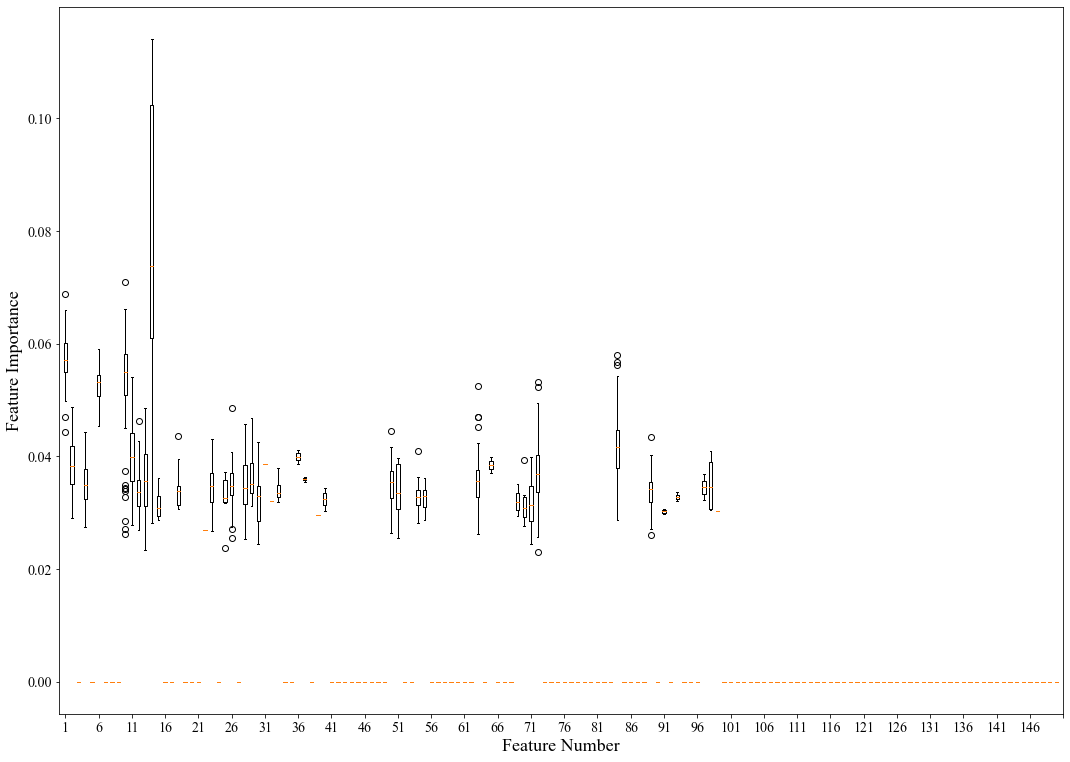

In [55]:
mlpr_coef_list  = [np.abs(l) if l != [] else 0 for l in mlpr_importance_dict.values()]
plt.boxplot(mlpr_coef_list)
plt.xticks(np.arange(1, len(label_list) + 1, 5), labels=label_list[::5])
plt.xlim(0, len(label_list))
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [56]:
feature_avg_weight_dict = dict(zip(label_list[0:-1], [np.mean(l) for l in zip(mlpr_coef_list)]))
feature_std_weight_dict = dict(zip(label_list[0:-1], [np.std(l) for l in zip(mlpr_coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[key]))
    count += 1

Rank  1: 14, has an avg. importance of 0.0774 with a std. dev. of 0.0219.
Rank  2: 1, has an avg. importance of 0.0574 with a std. dev. of 0.0043.
Rank  3: 10, has an avg. importance of 0.0538 with a std. dev. of 0.0074.
Rank  4: 6, has an avg. importance of 0.0529 with a std. dev. of 0.0030.
Rank  5: 84, has an avg. importance of 0.0416 with a std. dev. of 0.0055.
Rank  6: 11, has an avg. importance of 0.0400 with a std. dev. of 0.0057.
Rank  7: 36, has an avg. importance of 0.0399 with a std. dev. of 0.0013.
Rank  8: 2, has an avg. importance of 0.0386 with a std. dev. of 0.0070.
Rank  9: 31, has an avg. importance of 0.0386 with a std. dev. of 0.0000.
Rank 10: 65, has an avg. importance of 0.0385 with a std. dev. of 0.0014.
Rank 11: 72, has an avg. importance of 0.0372 with a std. dev. of 0.0057.
Rank 12: 29, has an avg. importance of 0.0371 with a std. dev. of 0.0055.
Rank 13: 63, has an avg. importance of 0.0363 with a std. dev. of 0.0054.
Rank 14: 13, has an avg. importance of 0.

The Neural Network performs better on the test set than either of the previous two models. This result is suprising. Nonetheless, the previous weights provide valuable insight into the decision making process of the network. The poor performance of all models on the held out test set and the large amount of cross validation suggest that these features are not sufficient to predict the winning percentage of teams based primarily on characteristics of the head coach. 